In [31]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


from sklearn.cluster import DBSCAN

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/sf-salaries/Salaries.csv
/kaggle/input/sf-salaries/database.sqlite


In [32]:
dataset=pd.read_csv('/kaggle/input/sf-salaries/Salaries.csv')

In [33]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148049 non-null  object 
 4   OvertimePay       148654 non-null  object 
 5   OtherPay          148654 non-null  object 
 6   Benefits          112495 non-null  object 
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            38119 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 14.7+ MB


Algoritma sayısal değerlerde ve kütüphanelerin doğru çalışması için veri tipini 
değiştirelim.

****Data Cleaning and Preprocessing****

In [34]:
# Convert columns to appropriate data types
dataset['BasePay'] = pd.to_numeric(dataset['BasePay'], errors='coerce')
dataset['OvertimePay'] = pd.to_numeric(dataset['OvertimePay'], errors='coerce')
dataset['OtherPay'] = pd.to_numeric(dataset['OtherPay'], errors='coerce')
dataset['Benefits'] = pd.to_numeric(dataset['Benefits'], errors='coerce')
dataset.drop(['EmployeeName'], axis=1, inplace=True)
dataset.drop(['JobTitle'], axis=1, inplace=True)
dataset.drop(['Agency'], axis=1, inplace=True)
dataset.drop(['Notes'], axis=1, inplace=True)
dataset.drop(['Status'], axis=1, inplace=True)

In [35]:
dataset.head()

,Id,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
0,1,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011
1,2,155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011
2,3,212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011
3,4,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011
4,5,134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011


In [36]:
# Check for missing values
dataset.isnull().sum()

Id                      0
BasePay               609
OvertimePay             4
OtherPay                4
Benefits            36163
TotalPay                0
TotalPayBenefits        0
Year                    0
dtype: int64

In [37]:
# Fill missing values with 0 for simplicity
dataset.fillna(0, inplace=True)

**Salary Distribution**

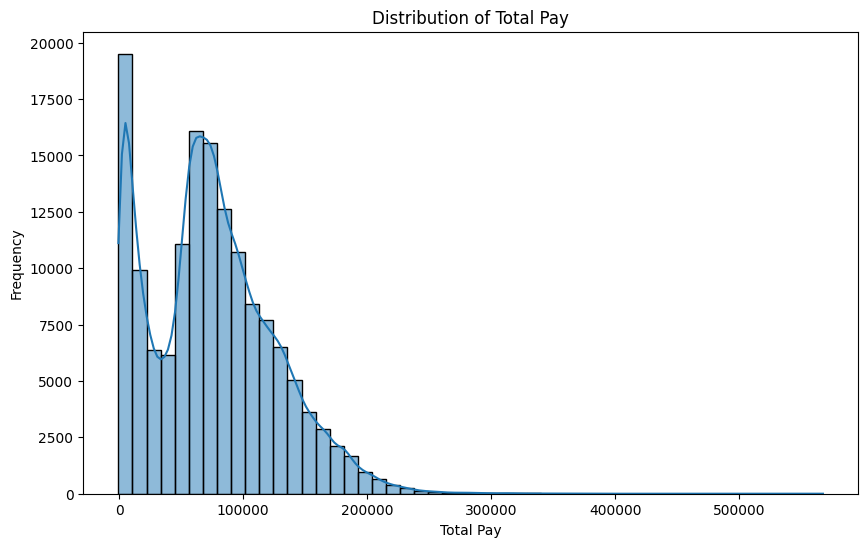

In [38]:
plt.figure(figsize=(10,6))
sns.histplot(dataset['TotalPay'], bins=50, kde=True)
plt.title('Distribution of Total Pay')
plt.xlabel('Total Pay')
plt.ylabel('Frequency')
plt.show()

****Correlation Analysis****


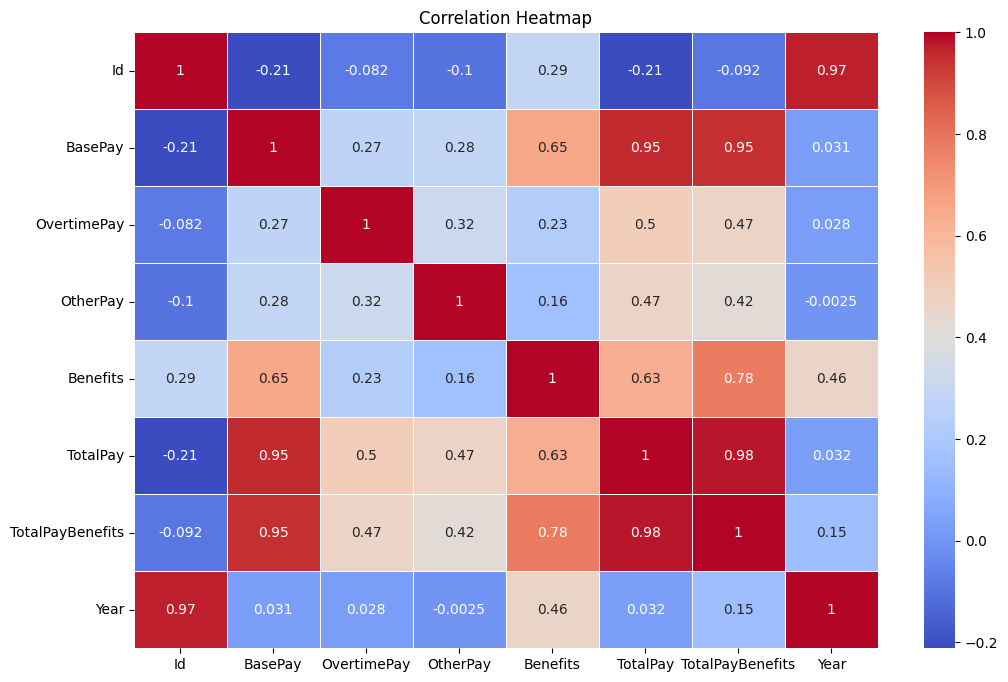

In [39]:
numeric_dataset=dataset.select_dtypes(include=[np.number])
correlation_matrix=numeric_dataset.corr()

#Plot the correlation heatmap 
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

Korelasyon matrisini incelediğimde pozitif değerler olduğunu gördüm bu yüzden Doğrusal Regresyon algoritmasının uygun olduğuna karar verdim.

Text(0.5, 0.98, 'Positive and Negative Correlation Visualizations')

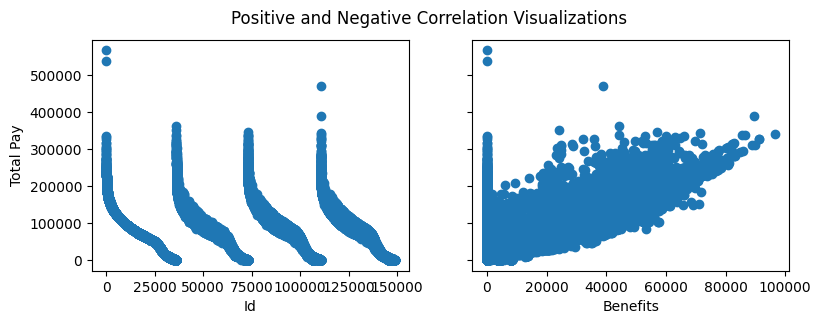

In [40]:
fig, axs = plt.subplots(1, 2, figsize=(9, 3), sharey=True)
axs[0].scatter(dataset["Id"].values, dataset["TotalPay"].values)
axs[0].set_xlabel('Id')
axs[0].set_ylabel('Total Pay')
axs[1].scatter(dataset["Benefits"].values, dataset["TotalPay"].values)
axs[1].set_xlabel('Benefits')
fig.suptitle('Positive and Negative Correlation Visualizations')

In [41]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
dataset_dropped = dataset.drop('TotalPay', axis=1)
X = dataset_dropped.values[:, 1:]
scaled_x = scaler.fit_transform(X)



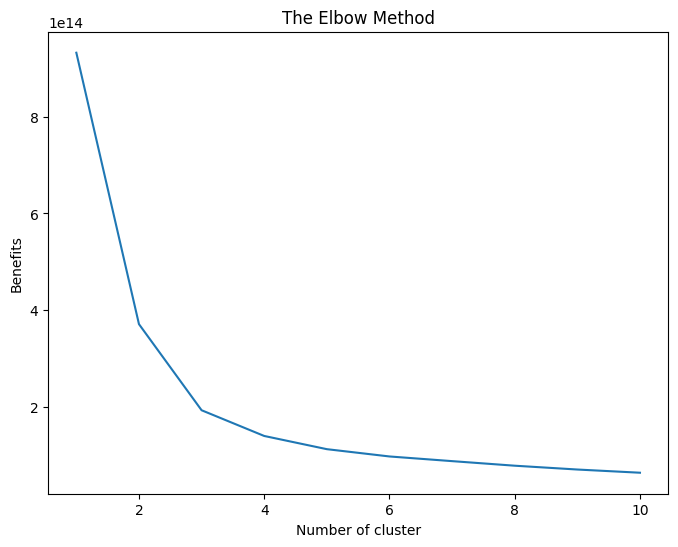

In [42]:
inertias = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300, n_init=12, random_state=0)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)
f3, ax = plt.subplots(figsize=(8, 6))
plt.plot(range(1,11),inertias)
plt.title('The Elbow Method')
plt.xlabel('Number of cluster')
plt.ylabel('Benefits')
plt.show()

In [43]:
model = KMeans(n_clusters=3)
training_points = scaled_x[:1000]
test_points = scaled_x[1000:]
model.fit(training_points)
labels = model.predict(test_points)

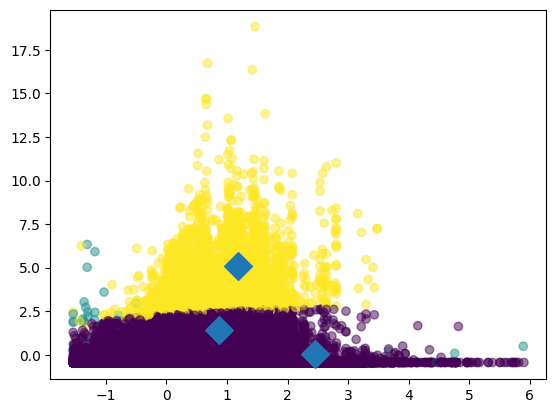

In [44]:
xs = test_points[:,0]
ys = test_points[:,1]

# Make a scatter plot of xs and ys, using labels to define the colors
plt.scatter(xs, ys, c=labels, alpha=0.5)

# Assign the cluster centers: centroids
centroids = model.cluster_centers_

# Assign the columns of centroids: centroids_x, centroids_y
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

# Make a scatter plot of centroids_x and centroids_y
plt.scatter(centroids_x, centroids_y, marker='D',s=200)
plt.show()

Bu grafikte veriler nerede gruplanmış diye bakıyoruz.0.5 ile 3 arasında 3 yerde kümelenmiş.


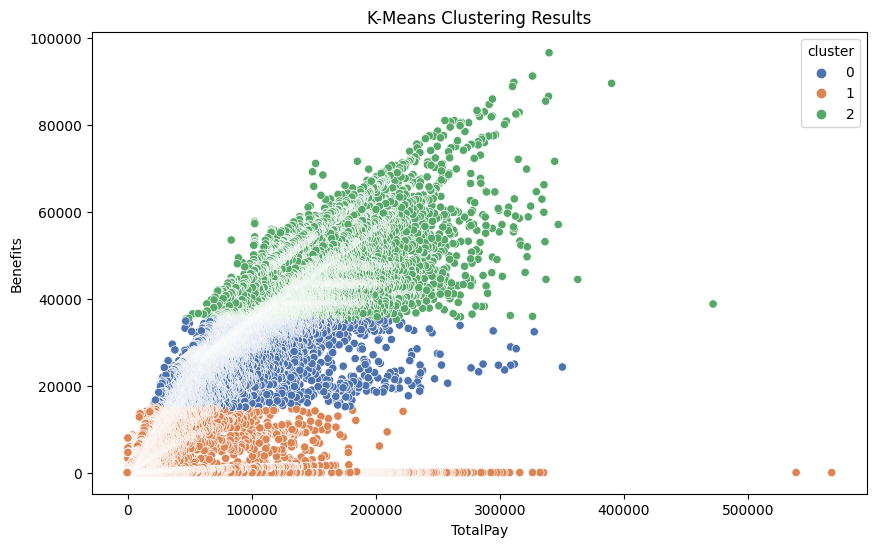

In [45]:
# Data Normalization for Clustering
scaler = StandardScaler()
scaled_data = scaler.fit_transform(dataset[['Benefits']])

# K-Means Clustering Model
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(scaled_data)

# Add cluster labels to the dataset
dataset['cluster'] = kmeans.labels_

# Visualize the Clustering
plt.figure(figsize=(10,6))
sns.scatterplot(x='TotalPay', y='Benefits', hue='cluster', data=dataset, palette="deep")
plt.title('K-Means Clustering Results')
plt.show()
